In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pos1 = pd.read_csv("posicoes_corrigidas.csv")
pos = pos1.copy()
pos.columns = ['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4',
                'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9',
                'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14',
                'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19',
                'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24',
                'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29',
                'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34',
                'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39',
                'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44',
                'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49',
                'PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4', 'energia']
pos = pos.drop(['energia'], axis=1)
pos.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,PBx0,PBy0,PBx1,PBy1,PBx2,PBy2,PBx3,PBy3,PBx4,PBy4
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,4.838018,5.034980,4.921049,4.835948,5.019050,4.925039,4.908979,5.029050,4.967010,5.004950,...,5.008970,4.637006,5.104001,5.088981,5.140021,5.025030,5.100991,4.838998,4.897989,4.903029
std,3.146096,3.228304,3.154793,3.150720,3.131866,3.190834,3.196073,3.167982,3.156596,3.177566,...,3.210457,3.136467,3.227289,3.146941,3.170261,3.155389,3.151982,3.191752,3.163508,3.127891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


criando o test set usando stratified sampling

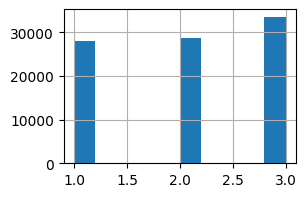

In [10]:
pos['x0_category'] = pd.cut(pos['x0'],
                                    bins=[0,3, 6, 11],
                                    labels = [1,2,3])
pos['x0_category'].hist(figsize=(3,2))
plt.show()
pos.dropna(subset=["x0_category"], inplace=True)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_splits = []
for train_index, test_index in splitter.split(pos, pos["x0_category"]): #.split(training data, target variable) ->generates indices to split data
    strat_train_set_n = pos.iloc[train_index]
    strat_test_set_n = pos.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n]) #strat_splits will be a list of lists, where each sub-list contains a pair of training and testing sets.

strat_train_set, strat_test_set = strat_splits[0]

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("x0_category", axis=1, inplace=True)

<ipython-input-12-2efda7cbdcb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("x0_category", axis=1, inplace=True)
<ipython-input-12-2efda7cbdcb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("x0_category", axis=1, inplace=True)


In [13]:
train = strat_train_set[:-6000]
valid = strat_train_set[-6000:]

In [14]:
y_train = pd.DataFrame()
y_train[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']] = train[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']]

y_test = pd.DataFrame()
y_test[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']] = strat_test_set[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']]

y_valid = pd.DataFrame()
y_valid[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']] = valid[['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4']]


In [15]:
train = train.drop(['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4'], axis=1)
strat_test_set = strat_test_set.drop(['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4'], axis=1)
valid = valid.drop(['PBx0', 'PBy0','PBx1','PBy1','PBx2', 'PBy2','PBx3','PBy3','PBx4', 'PBy4'],axis=1)

salvando os arquivos com as posições que eu vou usar:

In [16]:
df2 = pd.DataFrame(strat_test_set, columns=['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4',
                'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9',
                'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14',
                'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19',
                'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24',
                'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29',
                'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34',
                'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39',
                'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44',
                'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49'])
df2.to_csv('posicoes_corretas_dispositivos.csv', index=False)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(train)
X_valid = scaler.transform(valid) #The transform method is used to apply the previously fitted scaler to new data
X_test = scaler.transform(strat_test_set)

#As saídas não devem ser normalizadas

#y_train = scaler.fit_transform(y_train)
#y_valid = scaler.transform(y_valid)
#y_test = scaler.transform(y_test)

In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(200,activation='selu',kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(10)
])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_first_keras_model.keras",save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.4642 - val_loss: 0.0948
Epoch 2/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0580 - val_loss: 0.1381
Epoch 3/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1257 - val_loss: 0.0975
Epoch 4/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1013 - val_loss: 0.1056
Epoch 5/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0949 - val_loss: 0.0836
Epoch 6/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0899 - val_loss: 0.0457
Epoch 7/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0803 - val_loss: 0.0477
Epoch 8/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0651 - val_loss: 0.0553
Epoch 9/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0609 - val_loss: 0.0743
Epoch 10/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0622 - val_loss: 0.0426
Epoch 11/100
2068/2068 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0589 - val_loss: 0.0661
Epoch 12/100
2068/2

`model = tf.keras.models.load_model("my_first_keras_model.h5")` para usar o modelo salvo novamente

In [21]:
mse_test = model.evaluate(X_test,y_test)

564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0186


In [22]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[ 9.071195    8.04873     5.04275     1.132046    9.944653    9.97161
   3.8974233   3.1681812   8.802686    4.933678  ]
 [ 2.151969    4.8448195   9.884054    3.184093    9.033272    4.9375153
  -0.07858253  7.158389    9.837408   10.093512  ]
 [ 9.803       0.74131525  5.0114536   1.853255    9.758004    4.064534
   5.9489636   6.9134192   1.0337484   1.0640736 ]]
       PBx0  PBy0  PBx1  PBy1  PBx2  PBy2  PBx3  PBy3  PBx4  PBy4
34160   9.0   8.0   5.0   1.0  10.0  10.0   4.0   3.0   9.0   5.0
71887   2.0   5.0  10.0   3.0   9.0   5.0   0.0   7.0  10.0  10.0
68669  10.0   1.0   5.0   2.0  10.0   4.0   6.0   7.0   1.0   1.0


salvando os valores previstos

In [23]:
y_predictions = model.predict(X_test)

df = pd.DataFrame(y_predictions, columns=['PBx0_pred', 'PBy0_pred','PBx1_pred','PBy1_pred',
                                          'PBx2_pred', 'PBy2_pred','PBx3_pred','PBy3_pred',
                                          'PBx4_pred', 'PBy4_pred'])

df.to_csv('PB_predictions_corrigido.csv', index = False)

564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
